In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

In [6]:
#reading file path

file_path=r'C:\Users\Admin\Downloads\airports.csv'
data = pd.read_csv(file_path)

In [8]:
data.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
4,506791,00AN,small_airport,Katmai Lodge Airport,59.093287,-156.456699,80.0,NaN,US,US-AK,King Salmon,no,00AN,NaN,00AN,NaN,NaN,NaN


In [10]:
data.columns

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'iso_country', 'iso_region',
       'municipality', 'scheduled_service', 'gps_code', 'iata_code',
       'local_code', 'home_link', 'wikipedia_link', 'keywords'],
      dtype='object')

In [11]:
data.shape

(75605, 18)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75605 entries, 0 to 75604
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 75605 non-null  int64  
 1   ident              75605 non-null  object 
 2   type               75605 non-null  object 
 3   name               75605 non-null  object 
 4   latitude_deg       75605 non-null  float64
 5   longitude_deg      75605 non-null  float64
 6   elevation_ft       61352 non-null  float64
 7   continent          38999 non-null  object 
 8   iso_country        75346 non-null  object 
 9   iso_region         75605 non-null  object 
 10  municipality       70636 non-null  object 
 11  scheduled_service  75605 non-null  object 
 12  gps_code           41217 non-null  object 
 13  iata_code          8872 non-null   object 
 14  local_code         32606 non-null  object 
 15  home_link          3617 non-null   object 
 16  wikipedia_link     109

In [13]:
#finding a null(missing) value

data.isnull().sum()

id                       0
ident                    0
type                     0
name                     0
latitude_deg             0
longitude_deg            0
elevation_ft         14253
continent            36606
iso_country            259
iso_region               0
municipality          4969
scheduled_service        0
gps_code             34388
iata_code            66733
local_code           42999
home_link            71988
wikipedia_link       64666
keywords             58836
dtype: int64

In [14]:
#droped missing value column 

data.drop(['home_link','wikipedia_link','continent','iata_code'],axis=1,inplace=True)

In [15]:
print(data.describe())

                  id  latitude_deg  longitude_deg  elevation_ft
count   75605.000000  75605.000000   75605.000000  61352.000000
mean   159322.331671     25.667579     -28.716276   1303.362743
std    162736.673711     26.243054      86.298884   1673.673558
min         2.000000    -90.000000    -179.876999  -1266.000000
25%     19048.000000     11.918614     -94.125510    206.000000
50%     40517.000000     35.120056     -69.714411    730.000000
75%    334811.000000     42.659400      24.364180   1617.000000
max    509352.000000     82.750000     179.975700  17372.000000


In [18]:
#explore unique value in columns

categorial_columns =['type','scheduled_service']
for column in categorial_columns:
    unique_values= data[column].unique()
    print(f"unique value in {column} column: {unique_values}")

unique value in type column: ['heliport' 'small_airport' 'closed' 'seaplane_base' 'balloonport'
 'medium_airport' 'large_airport']
unique value in scheduled_service column: ['no' 'yes']


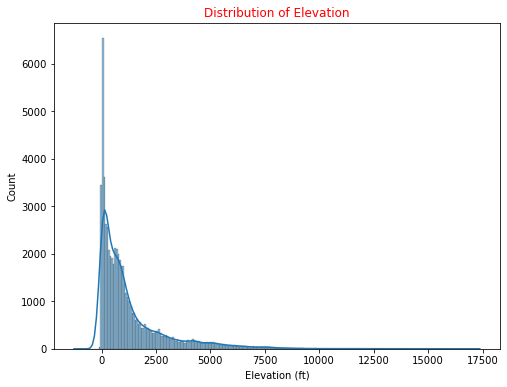

In [21]:
#Distibution of elevation 

plt.figure(figsize=(8, 6))
sns.histplot(data['elevation_ft'].dropna(),kde=True)
plt.title('Distribution of Elevation',c='r')
plt.xlabel('Elevation (ft)')
plt.ylabel('Count')
plt.show()

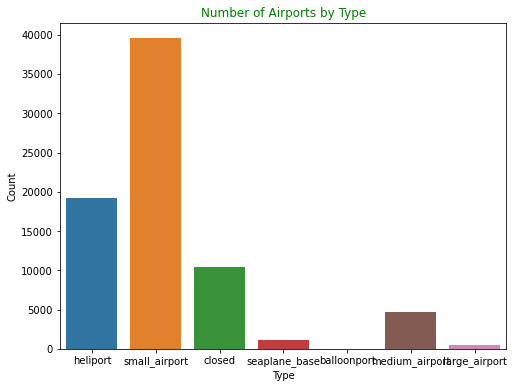

In [26]:
#Number of airports baased on their type

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='type')
plt.title('Number of Airports by Type',c='g')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

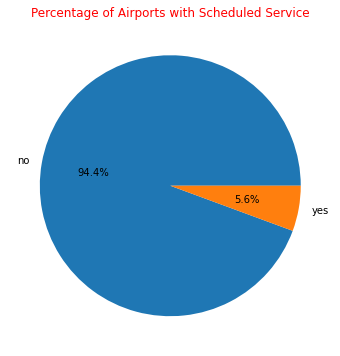

In [27]:
#airport with scheduled service

plt.figure(figsize=(10, 6))
data['scheduled_service'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage of Airports with Scheduled Service',c='r')
plt.ylabel('')
plt.show()

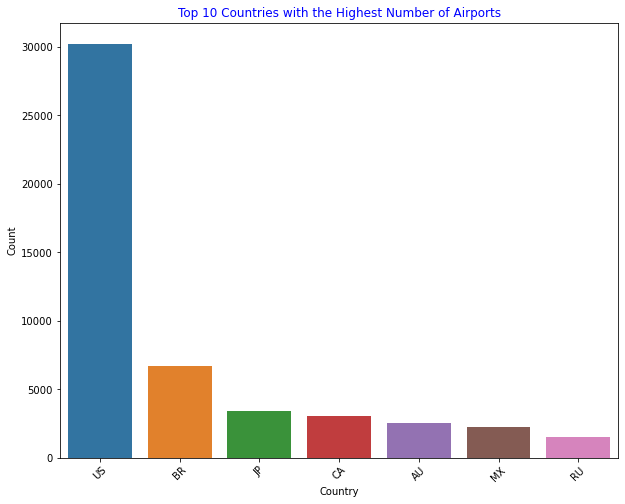

In [29]:
# Countried which having highest no of airports

top_countries = data['iso_country'].value_counts().nlargest(7)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries with the Highest Number of Airports', c='b')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

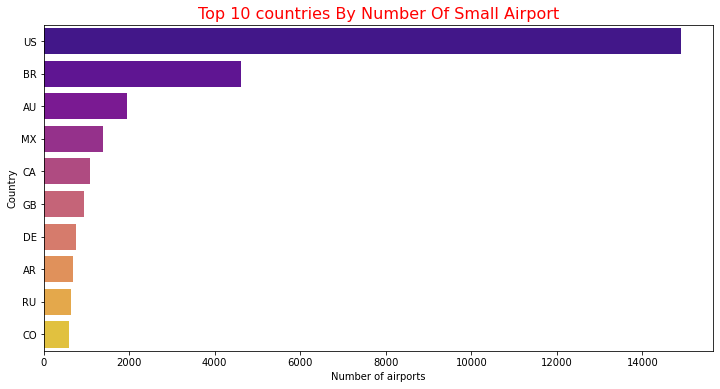

In [37]:
#top 10 countrie by no of small airport

small = data[data.type=='small_airport']
top_small = small.iso_country.value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_small.values, y=top_small.index, palette='plasma')
plt.title("Top 10 countries By Number Of Small Airport", c='r',fontsize=16)
plt.ylabel("Country")
plt.xlabel("Number of airports")
plt.show()

In [30]:
top_countries

US    30244
BR     6704
JP     3407
CA     3033
AU     2557
MX     2261
RU     1545
Name: iso_country, dtype: int64

In [39]:
top_small

US    14910
BR     4613
AU     1946
MX     1376
CA     1071
GB      945
DE      761
AR      685
RU      630
CO      600
Name: iso_country, dtype: int64

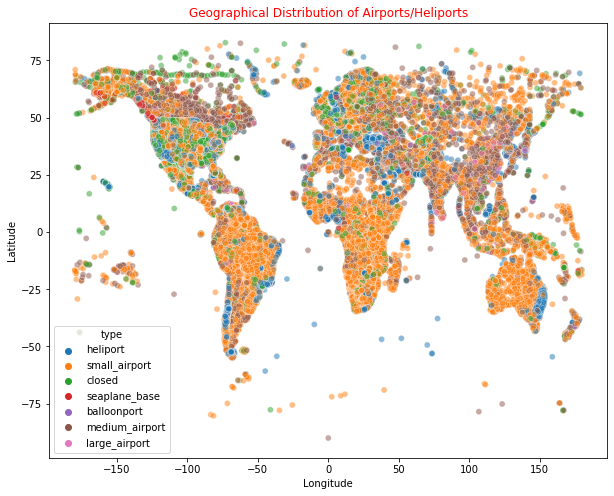

In [35]:
#Geographical disribution of airport and heliports


plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='longitude_deg', y='latitude_deg', hue='type',alpha=0.5)
plt.title('Geographical Distribution of Airports/Heliports',c='r')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

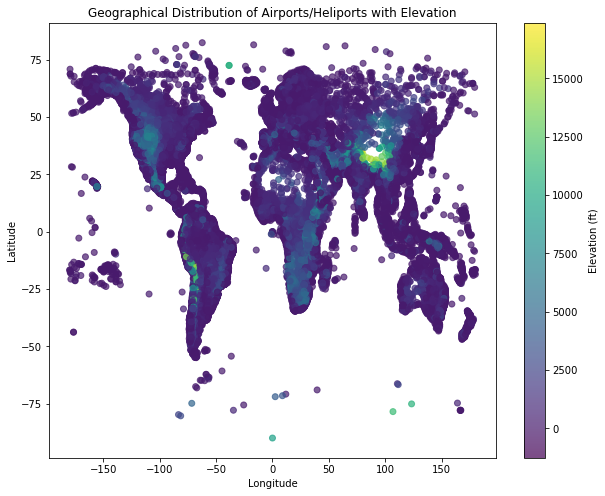

In [32]:
# Geo distribution of aiport/heliport with elevation

plt.figure(figsize=(10, 8))
scatter = plt.scatter(data['longitude_deg'], data['latitude_deg'], c=data['elevation_ft'], cmap='viridis', alpha=0.7)
plt.title('Geographical Distribution of Airports/Heliports with Elevation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(scatter, label='Elevation (ft)')
plt.show()

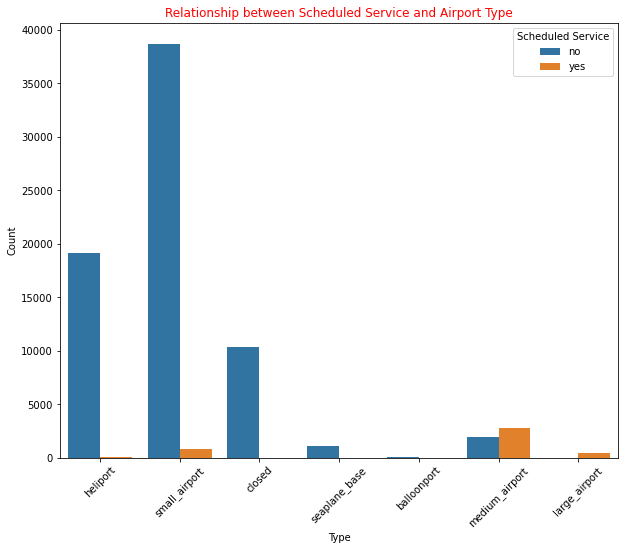

In [33]:
#Relation b/w sceduled service and airport type

plt.figure(figsize=(10, 8))
sns.countplot(data=data, x='type', hue='scheduled_service')
plt.title('Relationship between Scheduled Service and Airport Type',c='r')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Scheduled Service')
plt.show()